## Lending Club Case Study

### Introduction
On this notebook we are trying to Analyse the loan data provided by the company from which we are trying to find the driving factors for the loan default. This can ne used to identify which users are likely to default on their loan payment and would help company to take call on whether or not to provide the loan and if yes how risky is the investment.

### Team Members
1. Kiran Arun Sutar
2. Prateek Toshniwal

### Subsections
This notebook is contains the below sub-sections explaining the approach towards inferences from the data. 
1. Data Understanding
2. Data Cleaning
3. Data Manipulation and Imputing
4. Data Analysis
5. Presentation and recommendation (In seperate PDF file)
6. Conclusion

## Understanding from Data Dictionary

We have the Data Dictionary provided. From the Problem statement, and data provided, we will try to identify which colmns are most relevant for the recommendation. 


In [178]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
#read the dataset and check the first five rows
df = pd.read_csv("loan.csv")


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


The dataset contains a lot of fields which are not much relevent for the recommendations we want to make.

From the data Dictonary we find the below fields would be very important for the analysis
- loan_amnt
- term  
- int_rate
- installment
- grade
- sub_grade
- emp_length
- home_ownership
- annual_inc
- verification_status
- issue_d 
- loan_status 
- purpose
- earliest_cr_line            
- total_pymnt

From the other fields, we might have additional useful information which is not obvious. 
But there are fileds which are obviously not going to contribute to recommendations. We will perform the data cleaning and manipulation next to get the most relevant data in useful format.

## Data Cleaning

First we will remove all the columns which are not having any information i.e. column which are having all the value empty or null.

In [182]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [184]:
# remove columns without values
df = df.dropna(thresh=1, axis=1)
df.shape

(39717, 57)

Now we have only 57 columns left from previous 111 columns.

Lets try to remove the columns which are not having much relevent information for the recommendation. 

There are columns which are having most value null or 0 or having same value for all entries in the column. These columns won't help us much for recommendation. SO they can be removed.

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [186]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Below we are removing columns which are not providing relavent information

In [187]:
# emp_title, desc, title - random values. 
df = df.drop(['emp_title','desc','title'], axis='columns')

# pymnt_plan, policy_code, initial_list_status, 
# application_type, acc_now_delinq, chargeoff_within_12_mths, 
# delinq_amnt, tax_liens - all values are same
df = df.drop(['pymnt_plan','policy_code','initial_list_status', 'application_type','acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt','tax_liens'], axis='columns')

# mths_since_last_record, next_pymnt_d, mths_since_last_delinq - mostly null values
df = df.drop(['mths_since_last_record','next_pymnt_d', 'mths_since_last_delinq'], axis='columns')

# pub_rec, out_prncp, out_prncp_inv, collections_12_mths_ex_med - mostly zero values
df = df.drop(['pub_rec','out_prncp','out_prncp_inv','collections_12_mths_ex_med'], axis='columns')

In [188]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [189]:
# Duplicate values columns to drop
# url - duplicate with id column
# addr_state - duplicate with zip code
# total_pymnt_inv - duplicate for total_pymnt

df = df.drop(['url','addr_state','total_pymnt_inv'], axis='columns')

In [190]:
# total_rec_prncp, total_rec_int, total_rec_late_fee, 
# recoveries, collection_recovery_fee - these columns along with 
# total_pymnt_inv make up the total_pymnt column. 
# These columns individually would not contribute much for default indentification. 
# As we have considered total_pymnt, the other columns can be ignored.

df = df.drop(['total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'], axis='columns')

In [191]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,3,13648,83.70%,9,5863.155187,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,5,3,1687,9.40%,4,1008.710000,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2,2,2956,98.50%,10,3005.666844,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,10,5598,21%,37,12231.890000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0,15,27783,53.90%,38,3513.330000,May-16,67.79,May-16,0.0


In [192]:
# removing id and member_id as they won't contribute towards the recommendation
df = df.drop(['id','member_id'], axis='columns')

In [193]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,1,3,13648,83.70%,9,5863.155187,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,5,3,1687,9.40%,4,1008.710000,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,2,2,2956,98.50%,10,3005.666844,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,1,10,5598,21%,37,12231.890000,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0,15,27783,53.90%,38,3513.330000,May-16,67.79,May-16,0.0


So, doing the above cleaning to remove the less relevent columns we are left with the 29 most relevent columns.

Here we see, all the columns which are looking important from the business perspective as mentioned in the Data Understanding section are intact and will be used for the analysis.

In [194]:
cleaned_data = df
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

## Data Manipulation and Imputing

Not from the cleaned data, we need to make sure that the columns are having correct data types, the null values can be filled where necessary and imputing is done where needed. 

We will perform the same in this section

For emp_length the Mode value is '10+ years'. We can Impute this value for the missing values in emp_length

In [195]:
cleaned_data['emp_length'].isnull().sum()

1075

In [196]:
cleaned_data['emp_length'].mode()

0    10+ years
dtype: object

In [197]:
cleaned_data['emp_length'] = cleaned_data['emp_length'].replace(np.NaN,'10+ years')

In [198]:
cleaned_data['emp_length'].isnull().sum()

0

In [199]:
cleaned_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [200]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

The int_rate column has the % sign appended on each value. We need to remove this sign so that we can treat the interest rate as numeric values column.

In [201]:
cleaned_data['int_rate'] = cleaned_data['int_rate'].apply(lambda x: x if pd.isnull(x) else np.float32(x[:-1]))

In [202]:
cleaned_data['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Same goes with column revol_util. We need to remove this sign so that we can treat it as numeric values column.

In [203]:
cleaned_data['revol_util'] = cleaned_data['revol_util'].apply(lambda x: x if pd.isnull(x) else np.float32(x[:-1]))

In [204]:
cleaned_data['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.299999
75%         72.400002
max         99.900002
Name: revol_util, dtype: float64

We can impute mean values for this column for the missing values.

In [205]:
cleaned_data['revol_util'] = cleaned_data['revol_util'].fillna(cleaned_data['revol_util'].mean())

In [206]:
cleaned_data['revol_util'].describe()

count    39717.000000
mean        48.832152
std         28.314793
min          0.000000
25%         25.500000
50%         49.200001
75%         72.300003
max         99.900002
Name: revol_util, dtype: float64

In [207]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

Now our data set looks good but there are few data columns which are showing as Objects. We need to convert them into the Date Datatype.

As the given data are formated like Dec-11, we will need a custom function to seperate the month and year and create a data from it in correct format.

In [208]:
def convert_date(in_date):
    #in_date = str(in_date)
    if in_date is None:
        return None
    month = in_date.split('-')[0]
    year = int(in_date.split('-')[1])
    
    if (year <= 21):
        year += 2000
    else:
        year += 1900
    
    date_str = month + ' 1, ' + str(year)
    return pd.to_datetime(date_str)

convert_date('Dec-11')

Timestamp('2011-12-01 00:00:00')

Lets now apply the function on the issue_d and earliest_cr_line columns

In [209]:
cleaned_data['issue_d'] = cleaned_data['issue_d'].apply(lambda x:convert_date(x))

In [210]:
cleaned_data['earliest_cr_line'] = cleaned_data['earliest_cr_line'].apply(lambda x:convert_date(x))

In [211]:
cleaned_data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

## Data Analysis 

Storing the cleaned and formated data incase we need to reload. And lets start to Analyze the cleaned data

In [214]:
final_data = cleaned_data

In [215]:
final_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,13382.528086,48.832152,22.088828,12153.596544,2678.826162,0.043260
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,15885.016641,28.314793,11.401709,9042.040766,4447.136012,0.204324
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,3703.000000,25.500000,13.000000,5576.930000,218.680000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,8850.000000,49.200001,20.000000,9899.640319,546.140000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,17058.000000,72.300003,29.000000,16534.433040,3293.160000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,149588.000000,99.900002,90.000000,58563.679930,36115.200000,2.000000


### Outliers handling

Now lets try to find out the outlier values from the important columns

In terms of load data, person Annual Income, the loan amount, installment and the Interest rate at which load is taken would be most important factors.

Lets try to find the outleirs for these columns.

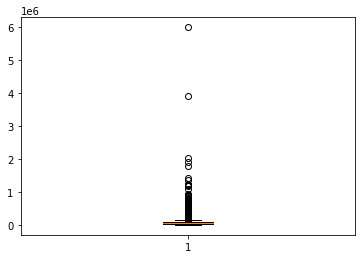

In [217]:
plt.boxplot(final_data['annual_inc'])
plt.show()

In [218]:
final_data.shape

(39717, 29)

After examining the box plot and histogram for the annual income we found that there are 14 values above 10 Lacs and total 698 values above 2 Lac.

We would consider the income below 2 lac for the data analysis as income above 2 lac is just 1.5% of whole data and cen be treated as outlier.

In [219]:
final_data = final_data[final_data['annual_inc'] < 200000]

In [220]:
final_data.shape

(39009, 29)

### Univariate and Bivariate Analysis

Now the annual income distribution looks good for the analysis. Lets start the Univariate and Bivariate analysis on these columns

We will try to perform the Univariate analysis on the single columns and then we would try to related them with the other co-related columns to identify the relationships and how it can contribute to the recommendations.


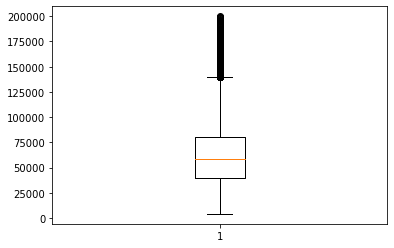

In [221]:
plt.boxplot(final_data['annual_inc'])
plt.show()

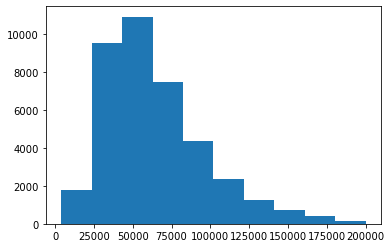

In [222]:
plt.hist(final_data['annual_inc'])
plt.show()

Lets Now plot interest rate box plot and histogram

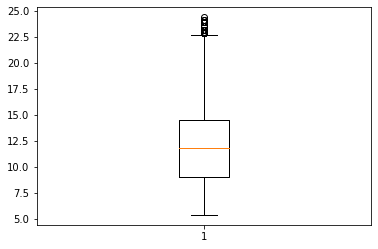

In [223]:
plt.boxplot(final_data['int_rate'])
plt.show()

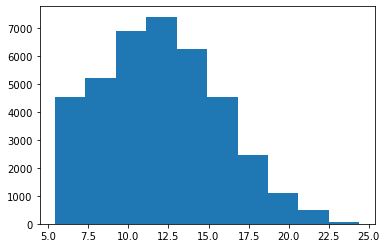

In [224]:
plt.hist(final_data['int_rate'])
plt.show()

Interest rate already looks at good distribution for the analysis.

The annual Income is currently numeric values column. Lets get it's range column as well which will be helpful for creating pivote table on the same.


In [227]:
import warnings
warnings.filterwarnings('ignore')

final_data['annual_income_range'] = pd.qcut(final_data['annual_inc'], 5, labels=['VL','L','M','H','VH'])
final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_income_range,int_rate_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,13648,83.699997,9,5863.155187,Jan-15,171.62,May-16,0.0,VL,9-13
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1687,9.400000,4,1008.710000,Apr-13,119.66,Sep-13,0.0,VL,21-25
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2956,98.500000,10,3005.666844,Jun-14,649.91,May-16,0.0,VL,21-25
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,5598,21.000000,37,12231.890000,Jan-15,357.48,Apr-16,0.0,L,17-21
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,27783,53.900002,38,3513.330000,May-16,67.79,May-16,0.0,H,13-17


Simillarly Lets create Interest rate range

In [228]:
final_data['int_rate_range'] = pd.qcut(final_data['int_rate'], 5, labels=['5-9','9-13','13-17','17-21','21-25'])
final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_income_range,int_rate_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,13648,83.699997,9,5863.155187,Jan-15,171.62,May-16,0.0,VL,9-13
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1687,9.400000,4,1008.710000,Apr-13,119.66,Sep-13,0.0,VL,21-25
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,2956,98.500000,10,3005.666844,Jun-14,649.91,May-16,0.0,VL,21-25
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,5598,21.000000,37,12231.890000,Jan-15,357.48,Apr-16,0.0,L,17-21
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,27783,53.900002,38,3513.330000,May-16,67.79,May-16,0.0,H,13-17


Lets write common function to drow the Stacked bar charts

In [229]:
def stackedBarChart(var_index, var_column):
    pivot_table = pd.pivot_table(data=final_data, values='loan_amnt', index=var_index, columns=var_column, aggfunc='count')
    pivot_table.plot(kind='bar', stacked=True, figsize=(10,6), ylabel='count_of_loans')
    plt.show()
    

Now lets create a Pivote table for Interest rate and plot a chart again the loan status to see how the interest rate affects the loan.

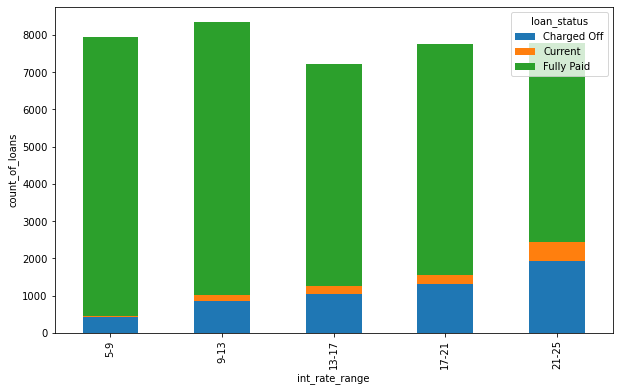

In [230]:
stackedBarChart('int_rate_range',['loan_status'])

<b> Inference 1 - The above chart clearly shows that the Inrest rate has huge impact on the Charged off rate. Higher interest rate chas more probability of default. <b>

Simillarly lets now create a Pivote table for Annual Income and plot a chart again the loan status to see how it affects the loan.

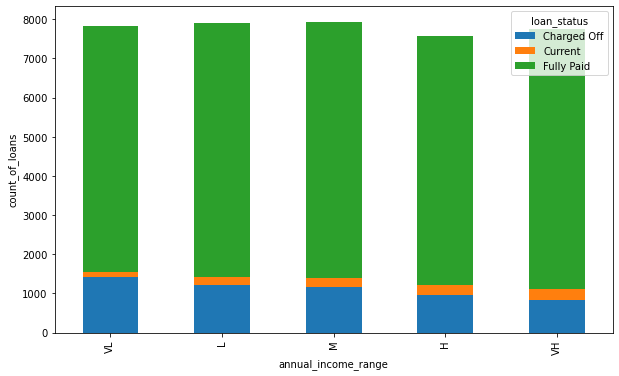

In [231]:
stackedBarChart('annual_income_range',['loan_status'])


<b> Inference 2 - The above chart clearly shows that the lower Income levels have higher probability of defaulting on the loan. <b>

But the above graph does not give strong trend, so lets try to take the ratio of annual income to the loan amount and lets see if this combined variable can give better trend.

In [232]:
final_data['income_loan_amount_ratio'] = final_data['annual_inc'] / final_data['loan_amnt']
final_data['income_loan_amount_ratio'].describe()

count    39009.000000
mean         8.502840
std          8.240497
min          1.204819
25%          3.925000
50%          6.000000
75%         10.000000
max        183.000000
Name: income_loan_amount_ratio, dtype: float64

The difference in mam is too high here compared to mean value. Lets take its log to get better distribution.

In [233]:
final_data['income_loan_amount_ratio'] = np.log(final_data['annual_inc'] / final_data['loan_amnt'])
final_data['income_loan_amount_ratio'].describe()

count    39009.000000
mean         1.868611
std          0.689788
min          0.186330
25%          1.367366
50%          1.791759
75%          2.302585
max          5.209486
Name: income_loan_amount_ratio, dtype: float64

Now lets plot box plot and histogram for this column

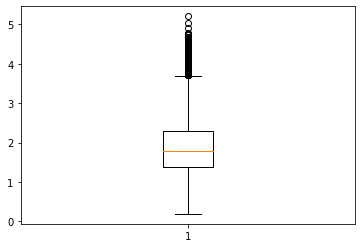

In [234]:
plt.boxplot(final_data['income_loan_amount_ratio'])
plt.show()

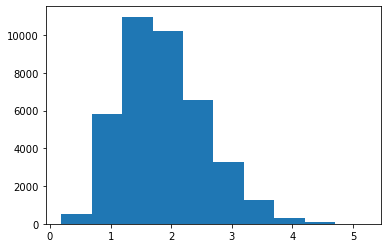

In [235]:
plt.hist(final_data['income_loan_amount_ratio'])
plt.show()

Now lets create categorial variable for this column so that we can use it in pivote table.

In [236]:
final_data['income_loan_ratio_range'] = pd.qcut(final_data['income_loan_amount_ratio'], 5, labels=['0-1','1-2','2-3','3-4','4-5'])
final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_income_range,int_rate_range,income_loan_amount_ratio,income_loan_ratio_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,9,5863.155187,Jan-15,171.62,May-16,0.0,VL,9-13,1.568616,1-2
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,4,1008.710000,Apr-13,119.66,Sep-13,0.0,VL,21-25,2.484907,4-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,10,3005.666844,Jun-14,649.91,May-16,0.0,VL,21-25,1.630220,2-3
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,37,12231.890000,Jan-15,357.48,Apr-16,0.0,L,17-21,1.593309,1-2
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,38,3513.330000,May-16,67.79,May-16,0.0,H,13-17,3.283414,4-5


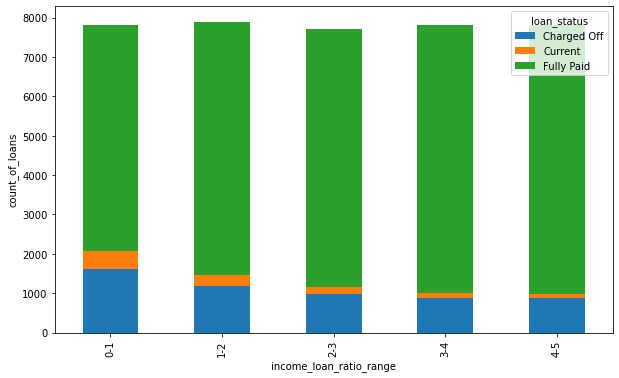

In [237]:
stackedBarChart('income_loan_ratio_range',['loan_status'])

<b> Inference 3 - This graph clearly shows that the ratio of loan amount to the persons income have big impact on probability to default. If the income to loan ratio is less then the probability of defaulting is more. </b>

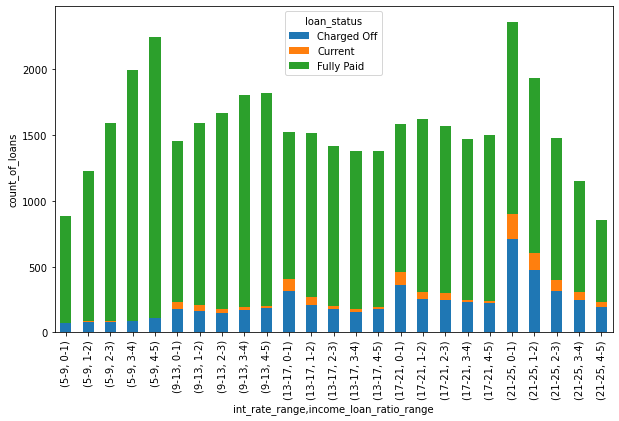

In [238]:
stackedBarChart(['int_rate_range','income_loan_ratio_range'],['loan_status'])


<b> Inference 4 - If we put this together we can see that lowerst income loan ratio and high interest rate is the combination to avoid as it has the highest default probability - (21-25, 0-1)</b>

Now lets see how experience contributes to default probability

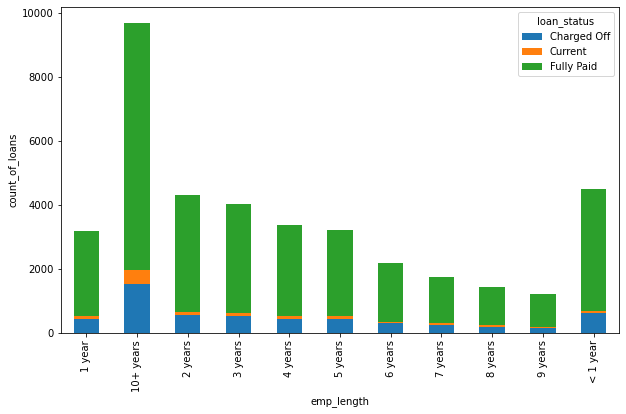

In [154]:
stackedBarChart('emp_length',['loan_status'])


Looks like experience does not show much impact on the default probability.
Lets check same for home_ownership.

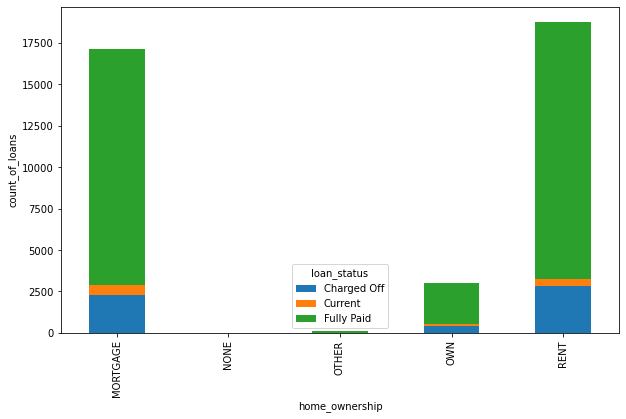

In [239]:
stackedBarChart('home_ownership',['loan_status'])

Looks like home_ownership also does not show much impact on the default probability.
Lets check same for purpose.

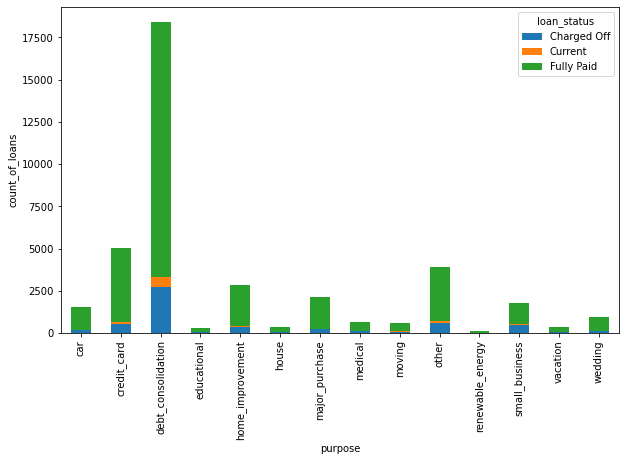

In [240]:
stackedBarChart('purpose',['loan_status'])


Looks like people take loan often for debt consolidation and defaults rate their is high. Let find how purpose fairs against the interest rate and if it can give some more insights.

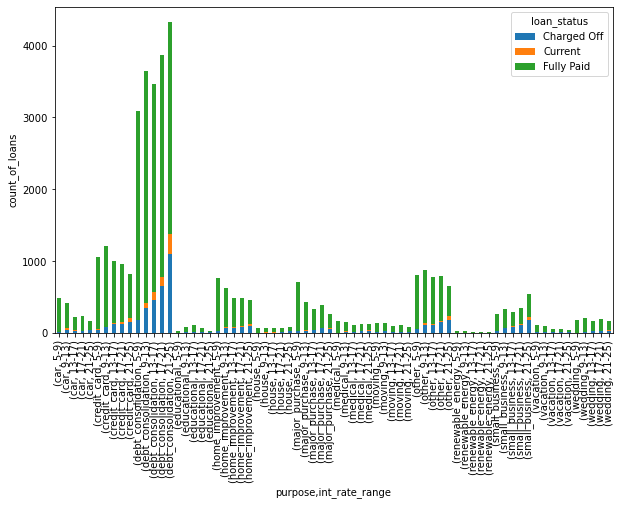

In [241]:
stackedBarChart(['purpose','int_rate_range'],['loan_status'])

<b> Inference 5 - This graph shown is the loan is taken for debt consolidation and if the interest rate is high (21-25), the probability of default is high</b>

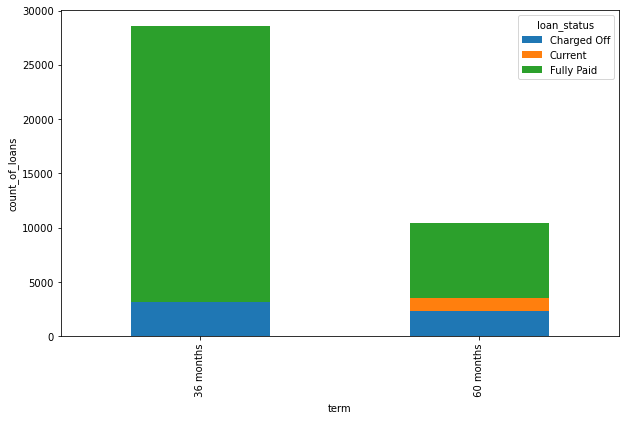

In [242]:
stackedBarChart('term',['loan_status'])

<b> Inference 6 - The probability for default is less for 36 months tenure loans. </b>

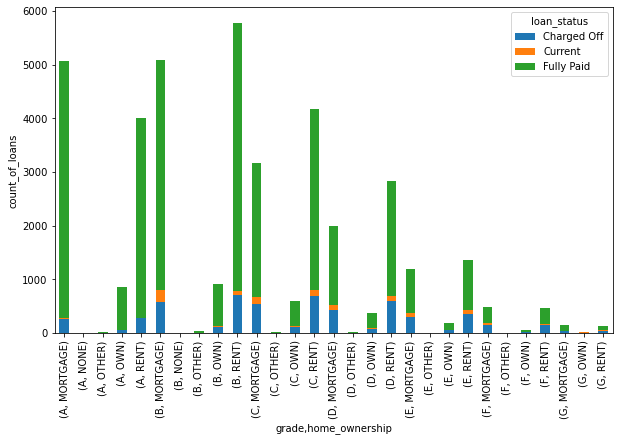

In [243]:
# Let's see if grade and home combined have any effect on default 
stackedBarChart(['grade','home_ownership'],['loan_status'])

In [244]:
final_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,annual_income_range,int_rate_range,income_loan_amount_ratio,income_loan_ratio_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,9,5863.155187,Jan-15,171.62,May-16,0.0,VL,9-13,1.568616,1-2
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,4,1008.710000,Apr-13,119.66,Sep-13,0.0,VL,21-25,2.484907,4-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,10,3005.666844,Jun-14,649.91,May-16,0.0,VL,21-25,1.630220,2-3
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,37,12231.890000,Jan-15,357.48,Apr-16,0.0,L,17-21,1.593309,1-2
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,38,3513.330000,May-16,67.79,May-16,0.0,H,13-17,3.283414,4-5


In [245]:
charged_off_data = final_data[final_data['loan_status']=='Charged Off']

Lets find out the how the charged off data is distributed

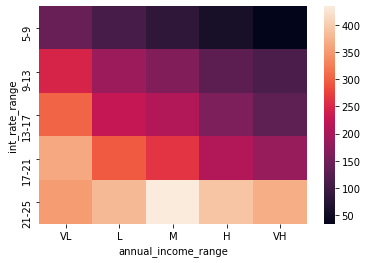

In [246]:
import seaborn as sns

pv1 = pd.pivot_table(data=charged_off_data, index='int_rate_range', columns='annual_income_range', values='loan_amnt', aggfunc='count')
sns.heatmap(pv1)
plt.show()

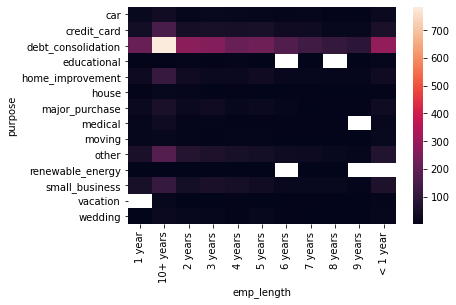

In [247]:
pv2 = pd.pivot_table(data=charged_off_data, index='purpose', columns='emp_length', values='loan_amnt', aggfunc='count')
sns.heatmap(pv2)
plt.show()

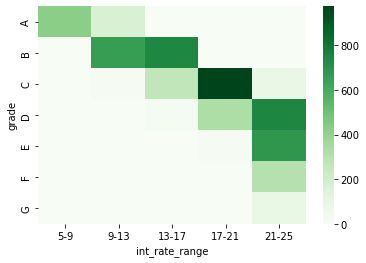

In [248]:
pv3 = pd.pivot_table(data=charged_off_data, index='grade', columns='int_rate_range', values='loan_amnt', aggfunc='count')
sns.heatmap(pv3, cmap='Greens')
plt.show()

In [249]:
#final_data.head()
#final_data[['loan_status','income_loan_ratio_range','int_rate_range','emp_length','purpose','home_ownership']]
#all_vars_df = pd.DataFrame(final_data[['loan_status','income_loan_ratio_range','int_rate_range','emp_length','purpose','home_ownership']])
#corr = all_vars_df.corr()
#final_data['loan_amnt'].corr(final_data['int_rate'])
#print(corr)
# plot the heatmap
#sns.heatmap(corr)

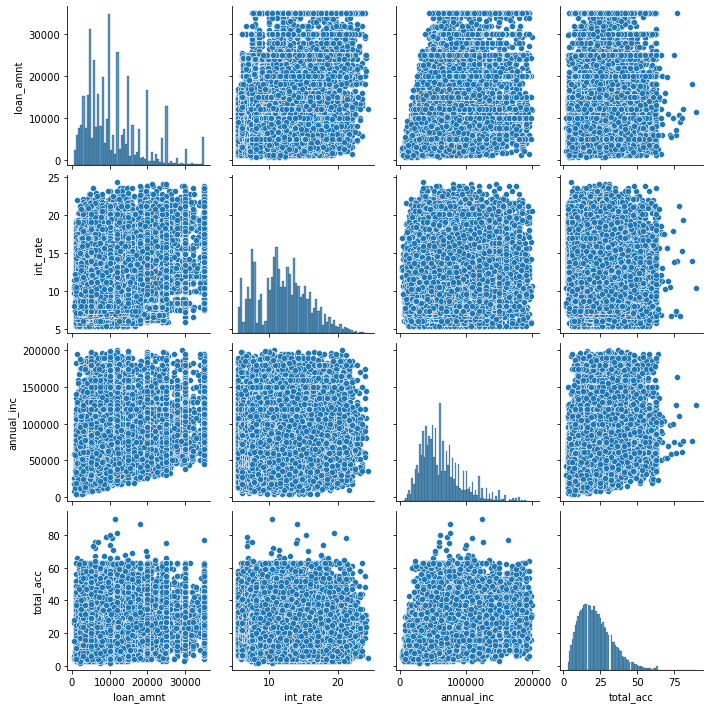

In [250]:
sns.pairplot(final_data[['loan_amnt','int_rate','annual_inc','total_acc']])
                        #'emp_length','purpose','home_ownership'
plt.show()

The above charts are not looking much conclusive. Lets try again the count plots for the different loan_status

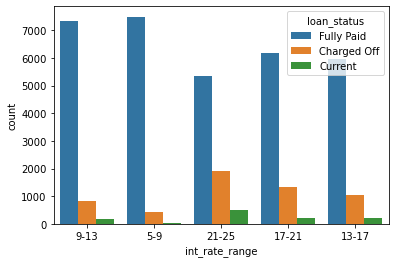

In [251]:
sns.countplot(data=final_data, x='int_rate_range', order=final_data['int_rate_range'].value_counts().index, hue='loan_status')
plt.show()

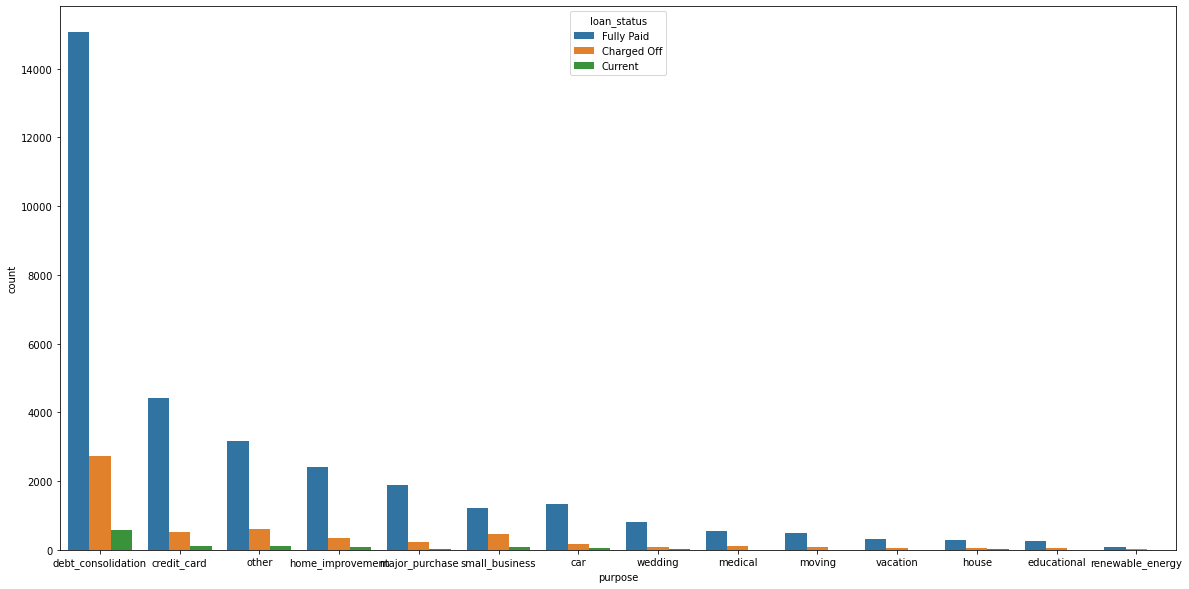

In [252]:
plt.figure(figsize=(20,10))
sns.countplot(data=final_data, x='purpose', order=final_data['purpose'].value_counts().index, hue='loan_status')
plt.show()

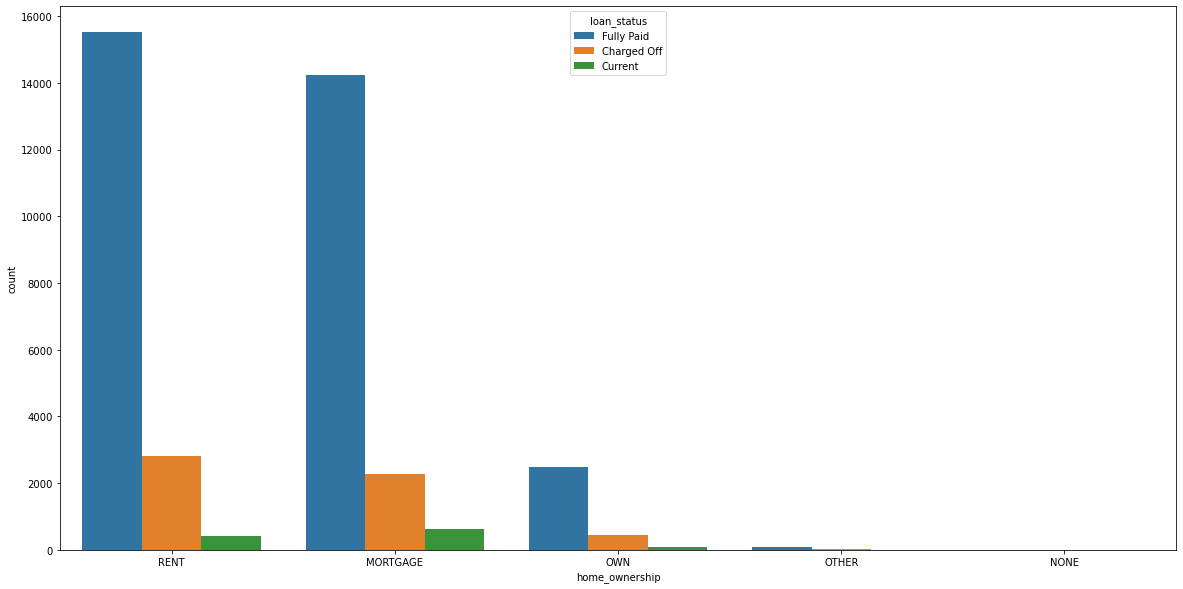

In [253]:
plt.figure(figsize=(20,10))
sns.countplot(data=final_data, x='home_ownership', order=final_data['home_ownership'].value_counts().index, hue='loan_status')
plt.show()

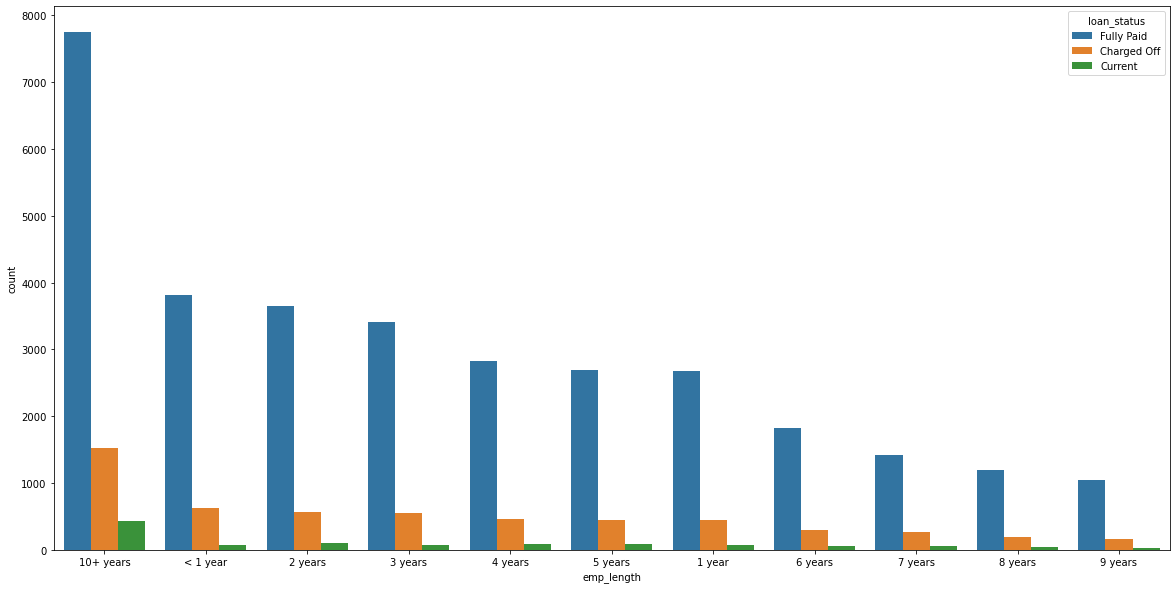

In [254]:
plt.figure(figsize=(20,10))
sns.countplot(data=final_data, x='emp_length', order=final_data['emp_length'].value_counts().index, hue='loan_status')
plt.show()

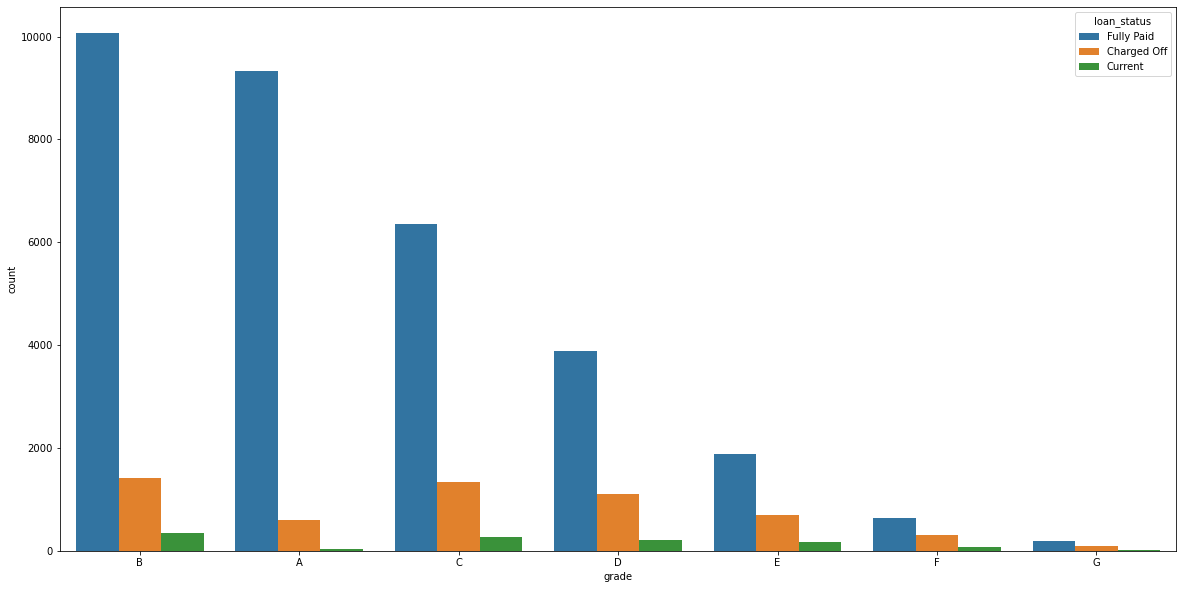

In [255]:
plt.figure(figsize=(20,10))
sns.countplot(data=final_data, x='grade', order=final_data['grade'].value_counts().index, hue='loan_status')
plt.show()

## Conclusion


Following factors are highly impacting on probability of the defaulters and should be considered while processing the loan application:
 - Higher interest rate 
 - Medium income range and high interest rate.
 - Lower income-to-loan ratio and high interest rate is the combination to avoid as it has the highest default probability - (21-25, 0-1)
 - If loan purpose is debt consolidation and if the interest rate is high (21-25).
 - Employee’s experience - 1 year and <1 emplyee length have higher chance of defaults.
